In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:

# Create results directory if it doesn't exist
results_dir = "../results"
os.makedirs(results_dir, exist_ok=True)

In [5]:

# Load Tesla stock dataset
file_path = os.path.join("../data", "TESLA.csv")  # Dynamic path
data = pd.read_csv(file_path)

In [7]:
# Display first few rows
print("First 5 rows of data:")
display(data.head())

First 5 rows of data:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [9]:
# Check data structure & missing values
print("\n Dataset Info:")
print(data.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB
None


In [11]:

print("\n Checking for missing values:")
print(data.isnull().sum())


 Checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

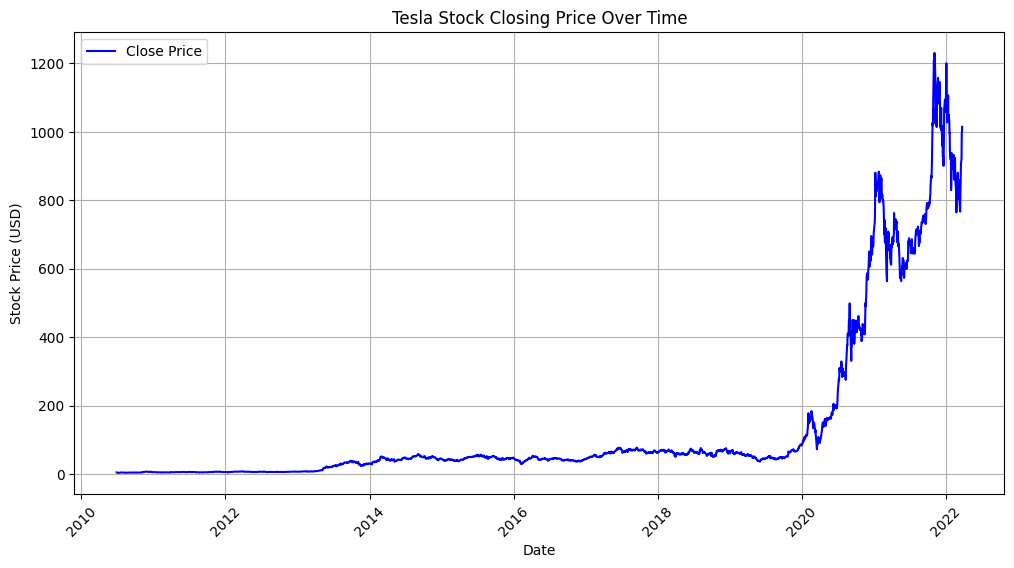

In [15]:

# Plot Closing Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Save the plot
plot_path = os.path.join(results_dir, "tesla_stock_trend.png")
plt.savefig(plot_path)
plt.show()


In [19]:
# Moving Average for trend analysis
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()


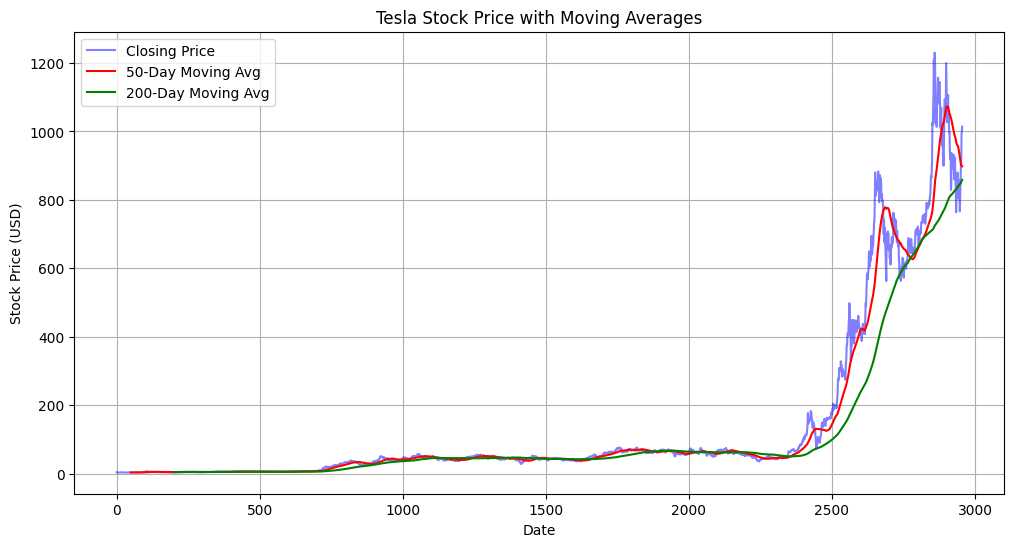

In [21]:
# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(data['50_MA'], label='50-Day Moving Avg', color='red')
plt.plot(data['200_MA'], label='200-Day Moving Avg', color='green')
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [23]:
# Volatility (Daily % Change)
data['Daily Change %'] = data['Close'].pct_change() * 100



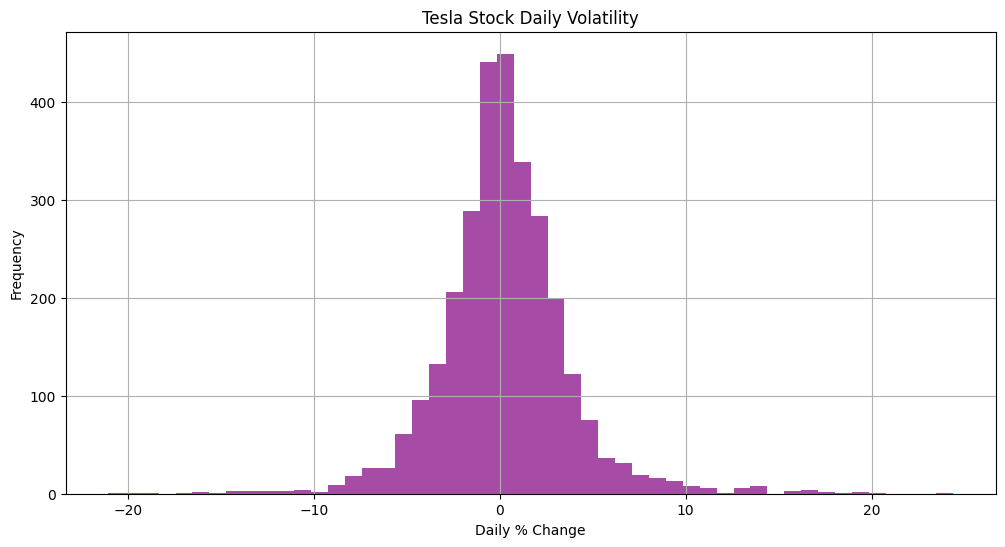

In [25]:
plt.figure(figsize=(12, 6))
plt.hist(data['Daily Change %'].dropna(), bins=50, alpha=0.7, color='purple')
plt.title("Tesla Stock Daily Volatility")
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.grid()
plt.show()
